# Clustering the JSON documents using all three scores

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import os, json
dir = os.getcwd()

test_D = []
with open("../outputs/scores_list.json", 'r', encoding='utf-8') as f:
    json_data = f.read()
    test_D = json.loads(json_data)
    
test_D[0][0]

0

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from SetSimilaritySearch import all_pairs

In [ ]:
def similarity_score_util(x, y):
    x, y = int(x), int(y)

    if (x == y):
        return 1
    
    s1 = test_D[x]
    s2 = test_D[y]

    sets = []
    sets.append(s1[3])
    sets.append(s2[3])

    score1 = all_pairs(sets, similarity_func_name = "jaccard", similarity_threshold = 0)        # structural score
    score1 = list(score1)[0][2]
    score2 = cosine_similarity(np.array(s1[1]).reshape(1, -1), np.array(s2[1]).reshape(1, -1))  # contextual score
    score3 = semanticSimilarity(s1[2], s2[2])                                                   # semantic score

    final_score = (score1/2) + (score2 + score3)/4                                              # final score that combines all three scores

    return final_score


In [ ]:
list1 = [i for i in range(0, 100)]
list2 = [i for i in range(14000, 14100)]
list1.extend(list2)

X_train = np.array(list1).reshape(-1, 1)
len(X_train)

200

In [ ]:
from sklearn.metrics import pairwise_distances

# function to compute pairwise distances
def sim_affinity(X):
    return pairwise_distances(X, metric=similarity_score_util)

In [ ]:
from sklearn.cluster import KMeans
def get_cluster_kmeans(tfidf_matrix, num_clusters):
    km = KMeans(n_clusters = num_clusters)
    km.fit(tfidf_matrix)
    cluster_list = km.labels_.tolist()
    return cluster_list, km

In [ ]:
sim_aff_mat = sim_affinity(X_train)
clustering, model = get_cluster_kmeans(sim_aff_mat, 2)
unique_elements, counts_elements = np.unique(clustering, return_counts=True)
print("Unique Elements:", unique_elements)
print("\nValue Counts:", list(zip(unique_elements, counts_elements)))

np.where(model.labels_ == 0)

In [ ]:
np.where(model.labels_ == 1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
       dtype=int64),)

In [ ]:
model.inertia_

168.30336570396773

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

dists = euclidean_distances(model.cluster_centers_)
dists

array([[0.        , 9.21705101],
       [9.21705101, 0.        ]])

In [ ]:
# finding ideal K value
from sklearn import metrics
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    clustering, kmeanModel = get_cluster_kmeans(sim_aff_mat, k)
 
    distortions.append(sum(np.min(cdist(sim_aff_mat, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / 200)
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(sim_aff_mat, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / 200
    mapping2[k] = kmeanModel.inertia_
    unique_elements, counts_elements = np.unique(clustering, return_counts=True)
    print(f"\nFor k = {k}, \nUnique Elements: {unique_elements}")
    print("Value Counts:", list(zip(unique_elements, counts_elements)))


For k = 1, 
Unique Elements: [0]
Value Counts: [(0, 200)]

For k = 2, 
Unique Elements: [0 1]
Value Counts: [(0, 100), (1, 100)]

For k = 3, 
Unique Elements: [0 1 2]
Value Counts: [(0, 100), (1, 87), (2, 13)]

For k = 4, 
Unique Elements: [0 1 2 3]
Value Counts: [(0, 11), (1, 100), (2, 79), (3, 10)]

For k = 5, 
Unique Elements: [0 1 2 3 4]
Value Counts: [(0, 79), (1, 100), (2, 9), (3, 10), (4, 2)]

For k = 6, 
Unique Elements: [0 1 2 3 4 5]
Value Counts: [(0, 67), (1, 100), (2, 9), (3, 10), (4, 2), (5, 12)]

For k = 7, 
Unique Elements: [0 1 2 3 4 5 6]
Value Counts: [(0, 12), (1, 100), (2, 5), (3, 67), (4, 2), (5, 10), (6, 4)]

For k = 8, 
Unique Elements: [0 1 2 3 4 5 6 7]
Value Counts: [(0, 100), (1, 12), (2, 4), (3, 67), (4, 8), (5, 2), (6, 3), (7, 4)]

For k = 9, 
Unique Elements: [0 1 2 3 4 5 6 7 8]
Value Counts: [(0, 50), (1, 100), (2, 4), (3, 8), (4, 4), (5, 2), (6, 12), (7, 3), (8, 17)]


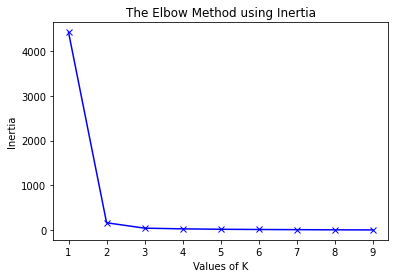

In [ ]:
# using inertias to find optimal value of K
import matplotlib.pyplot as plt
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [ ]:
clustering, model = get_cluster_kmeans(sim_aff_mat, 2)
unique_elements, counts_elements = np.unique(clustering, return_counts=True)
print("Unique Elements:", unique_elements)
print("\nValue Counts:", list(zip(unique_elements, counts_elements)))

Unique Elements: [0 1]

Value Counts: [(0, 100), (1, 100)]


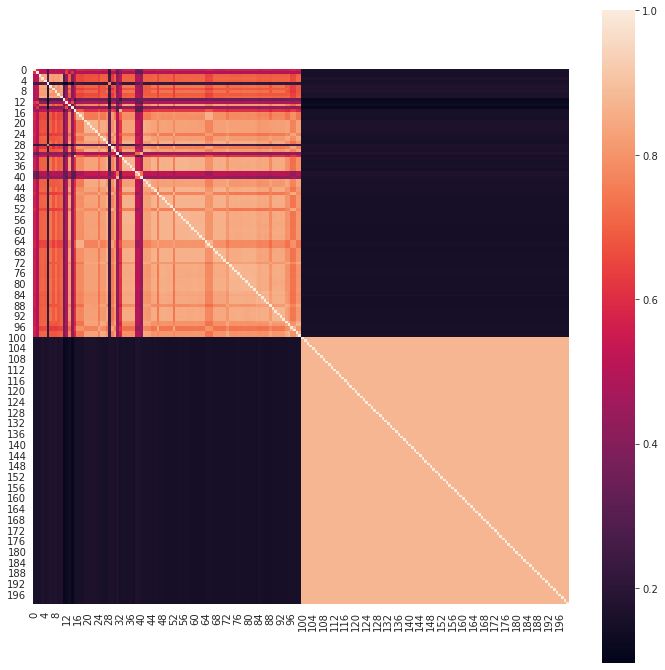

In [ ]:
# heatmap that shows the similarity between every pair of documents
import seaborn as sns

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(sim_aff_mat, square=True)

In [ ]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(distance_threshold=0.0, n_clusters=None, affinity=sim_affinity, linkage="complete")
model = model.fit(X_train)
plot_dendrogram(model, truncate_mode="level", p=3)